In [1]:
#attaching all libraries 
library(ggplot2)
library(dplyr)
library(ggrepel)
library(ggthemes)
library(RColorBrewer)
library(skimr)
library(psych)
library(janitor)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggrepel' was built under R version 3.6.3"Warning message:
"package 'ggthemes' was built under R version 3.6.3"Warning message:
"package 'skimr' was built under R version 3.6.3"
Attaching package: 'psych'

The following objects are masked from 'package:ggplot2':

    %+%, alpha

Warning message:
"package 'janitor' was built under R version 3.6.3"
Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test



In [2]:
#Loading and opening the dataset, The dataset df contains 8406 entries. Classifying  value fo co2 emmissions for each country from 
#1990 to 2014.
df <- read.csv(file = 'E:/Datasets/greenhouse_gas_inventory_data_data.csv', sep = ',')
head(df)

country_or_area,year,value,category
Australia,2014,393126.9,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
Australia,2013,396913.9,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
Australia,2012,406462.8,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
Australia,2011,403705.5,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
Australia,2010,406201.0,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
Australia,2009,408448.5,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


In [3]:
#Loading another dataset callled df1, This dataset contains Country with CO2 emmission and their population and life expectancy.
#We will use this dataset to determine whether high population contributes to high polution
df1<- read.csv(file = 'E:/Datasets/CO2Emission_LifeExp.csv', sep = ',')
head(df1)

Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
Albania,ALB,5208319,4.45,1.80,2886438,78.194
Algeria,DZA,156220560,0.17,3.85,40551392,76.298
Angola,AGO,30566933,3.13,1.06,28842489,59.925
Anguilla,AIA,30262,1.52,2.10,14429,81.441
Antigua and Barbuda,ATG,438763,1.51,4.64,94527,76.617


In [4]:
#Cleaning the values under 'Category' into shorter values: Data Cleaning
#Before Data Cleaning: 
head(df$category)

[1] carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
[2] carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
[3] carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
[4] carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
[5] carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
[6] carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
10 Levels: carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent ...

In [5]:
unique(df['category'])

,category
1,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
1075,greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent
2024,greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
3098,hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent
4073,methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
5147,nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent
5395,nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
6469,perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent
7300,sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent
8332,unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent


In [6]:
skim(df)

-- Data Summary ------------------------
                           Values
Name                       df    
Number of rows             8406  
Number of columns          4     
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  2     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 2 x 6
  skim_variable   n_missing complete_rate ordered n_unique
* <chr>               <int>         <dbl> <lgl>      <int>
1 country_or_area         0             1 FALSE         43
2 category                0             1 FALSE         10
  top_counts                                
* <chr>                                     
1 Eur: 250, Ger: 250, Uni: 250, Fra: 225    
2 car: 1074, gre: 1074, met: 1074, nit: 1074

-- Variable type: numeric ------------------------------------------------------
# A tibble: 2 x 11
  

In [7]:
#Data Cleaning: 
dataset <- df %>% transmute(category=recode(category, 
                                              carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='CO2', 
                                              greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent='GHG-indirect-CO2',
                                              greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='GHG',
                                              hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent='HFC',
                                              methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='CH4',
                                              nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent='HF3',
                                              nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent='N2Os',
                                              perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent='PFCs',
                                              sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent='SF6',
                                              unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent='HFC-PFC-mix'))

In [8]:
#Renaming the Column "country_or_area" to "country" and removing UN because it is not a country
dataset <- df%>% rename(country=country_or_area)%>%filter(country!='European Union')

In [9]:
str(df1)

'data.frame':	208 obs. of  7 variables:
 $ Country       : Factor w/ 208 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Code          : Factor w/ 208 levels "ABW","AFG","AGO",..: 2 5 53 3 4 9 7 8 1 10 ...
 $ CO2Emissions  : num  9.90e+06 5.21e+06 1.56e+08 3.06e+07 3.03e+04 ...
 $ YearlyChange  : num  7.13 4.45 0.17 3.13 1.52 1.51 0.16 3.06 1.51 -0.98 ...
 $ Percapita     : num  0.28 1.8 3.85 1.06 2.1 4.64 4.61 1.57 2.74 17.1 ...
 $ Population    : int  35383032 2886438 40551392 28842489 14429 94527 43508460 2936143 104872 24262712 ...
 $ LifeExpectancy: num  63.8 78.2 76.3 59.9 81.4 ...


In [10]:
skim(df1)

-- Data Summary ------------------------
                           Values
Name                       df1   
Number of rows             208   
Number of columns          7     
_______________________          
Column type frequency:           
  factor                   2     
  numeric                  5     
________________________         
Group variables            None  

-- Variable type: factor -------------------------------------------------------
# A tibble: 2 x 6
  skim_variable n_missing complete_rate ordered n_unique
* <chr>             <int>         <dbl> <lgl>      <int>
1 Country               0             1 FALSE        208
2 Code                  0             1 FALSE        208
  top_counts                    
* <chr>                         
1 Afg: 1, Alb: 1, Alg: 1, Ang: 1
2 ABW: 1, AFG: 1, AGO: 1, AIA: 1

-- Variable type: numeric ------------------------------------------------------
# A tibble: 5 x 11
  skim_variable  n_missing complete_rate         mean     

In [11]:
#To check if values should be dropped or not
nrowsdf1=nrow(df1)
nrowsdf1
ncompletedf1=sum(complete.cases(df1))
ncompletedf1
ncompletedf1/nrowsdf1

[1] 208

[1] 208

[1] 1

In [12]:
#The dataframe df1 is complete without any missing values therefore datacleaning is not required. 
#Understanding Dataframe df:
summary(df)

                 country_or_area      year          value        
 European Union          : 250   Min.   :1990   Min.   :      0  
 Germany                 : 250   1st Qu.:1996   1st Qu.:    298  
 United States of America: 250   Median :2002   Median :   7840  
 France                  : 225   Mean   :2002   Mean   : 205547  
 Japan                   : 225   3rd Qu.:2008   3rd Qu.:  65899  
 Canada                  : 223   Max.   :2014   Max.   :7422208  
 (Other)                 :6983                                   
                                                                                                           category   
 carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent :1074  
 greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent:1074  
 methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent        :107

In [13]:
max(df$value)

[1] 7422208

In [14]:
print(table(df$country, df$category))

                          
                           carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
  Australia                                                                                                                           25
  Austria                                                                                                                             25
  Belarus                                                                                                                             25
  Belgium                                                                                                                             25
  Bulgaria                                                                                                                            25
  Canada                                                                                                                              25
  Croatia     

In [15]:
subset(df,year==2014&value>40000)

,country_or_area,year,value,category
1,Australia,2014,393126.95,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
26,Austria,2014,64262.56,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
51,Belarus,2014,60615.65,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
76,Belgium,2014,96325.41,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
101,Bulgaria,2014,45139.96,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
126,Canada,2014,574099.78,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
201,Czech Republic,2014,101159.12,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
276,European Union,2014,3463397.56,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
301,Finland,2014,47597.73,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent
326,France,2014,341152.53,carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent


In [16]:
#Implementing machine learning algorithms.
#1.KNN
#2.PCA
#3. Linear Regression
#Lets divides the data sets into training dataset and test datasets.
set.seed(222)
df2 <- sample(2, nrow(df1),
              replace = TRUE,
              prob = c(0.8, 0.2))
training <- df1[df2==1,]
testing <- df1[df2==2,]

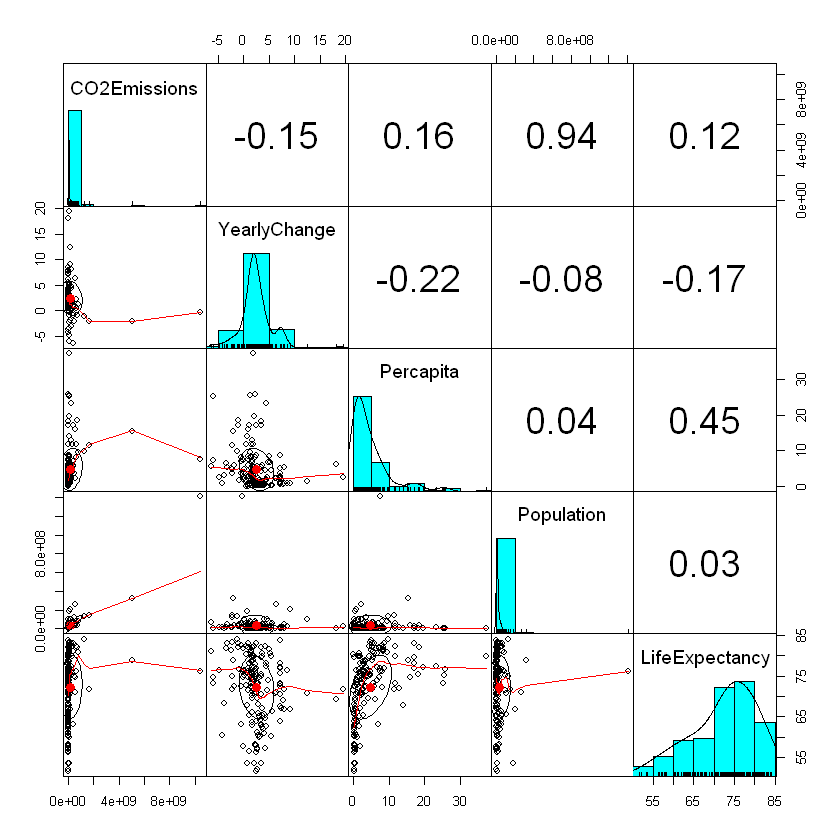

In [17]:
#KNN Machine Learning Algorithm in R
pairs.panels(training[,c(3:7)],
             gap = 0,
             bg = c("red", "yellow", "blue")[training$Species],
             pch=21)

In [18]:
pc <- prcomp(training[,c(3:7)],
             center = TRUE,
            scale. = TRUE)
attributes(pc)

$names
[1] "sdev"     "rotation" "center"   "scale"    "x"       

$class
[1] "prcomp"

In [19]:
pc$scale

CO2Emissions   YearlyChange      Percapita     Population LifeExpectancy 
  9.005661e+08   3.383551e+00   5.973708e+00   1.154688e+08   7.837494e+00

In [20]:
print(pc)


Standard deviations (1, .., p=5):
[1] 1.4334048 1.2171014 0.9296629 0.7414265 0.2236704

Rotation (n x k) = (5 x 5):
                      PC1        PC2         PC3          PC4         PC5
CO2Emissions    0.6531522 -0.2547012 -0.04817701  0.009177344 -0.71141712
YearlyChange   -0.2370637 -0.3423694 -0.90396301  0.091471556 -0.03267714
Percapita       0.2751713  0.5885592 -0.22428754  0.723297908  0.06643847
Population      0.6183384 -0.3552340 -0.05564953 -0.027578620  0.69829005
LifeExpectancy  0.2431696  0.5876371 -0.35655025 -0.683833523  0.02819250


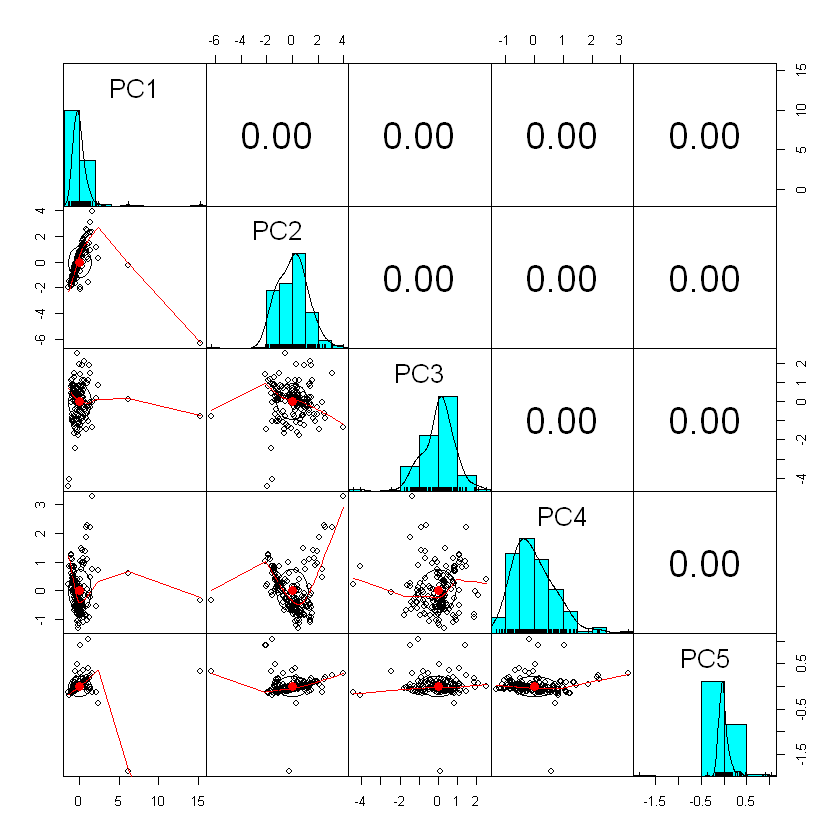

In [21]:
#Orthogonality of PCs
pairs.panels(pc$x,
             gap=0,
             bg = c("red", "yellow", "blue")[training$Species],
             pch=21)

In [22]:
trg <- predict(pc, training)
trg

,PC1,PC2,PC3,PC4,PC5
2,-0.36171329,0.09287530,-0.65791548,-0.81217061,-0.065837909
3,0.28498454,0.42718747,0.46860101,-0.52169052,0.099958104
4,-0.71275159,-1.30325885,0.53976853,0.65060267,0.009899093
7,0.36640528,0.47562556,0.44243574,-0.42347443,0.090969152
8,-0.38536415,-0.05558725,-0.11623157,-0.56752263,-0.066973165
9,-0.20305870,0.31852797,0.19967389,-0.57427438,-0.048290413
10,1.28301934,2.32535919,-0.03066309,0.47687791,-0.020533980
11,0.32374573,1.23285988,-0.27527914,-0.35611816,0.028311484
12,-0.06479919,0.29065335,0.83308516,-0.24769975,-0.002075192
13,0.13304144,1.00401226,-0.01970443,0.72605885,0.040070537


In [23]:
trg <- data.frame(trg, training[5])
trg
tst <- predict(pc, testing)
tst <- data.frame(tst, testing[5])


,PC1,PC2,PC3,PC4,PC5,Percapita
2,-0.36171329,0.09287530,-0.65791548,-0.81217061,-0.065837909,1.80
3,0.28498454,0.42718747,0.46860101,-0.52169052,0.099958104,3.85
4,-0.71275159,-1.30325885,0.53976853,0.65060267,0.009899093,1.06
7,0.36640528,0.47562556,0.44243574,-0.42347443,0.090969152,4.61
8,-0.38536415,-0.05558725,-0.11623157,-0.56752263,-0.066973165,1.57
9,-0.20305870,0.31852797,0.19967389,-0.57427438,-0.048290413,2.74
10,1.28301934,2.32535919,-0.03066309,0.47687791,-0.020533980,17.10
11,0.32374573,1.23285988,-0.27527914,-0.35611816,0.028311484,8.43
12,-0.06479919,0.29065335,0.83308516,-0.24769975,-0.002075192,3.45
13,0.13304144,1.00401226,-0.01970443,0.72605885,0.040070537,11.65


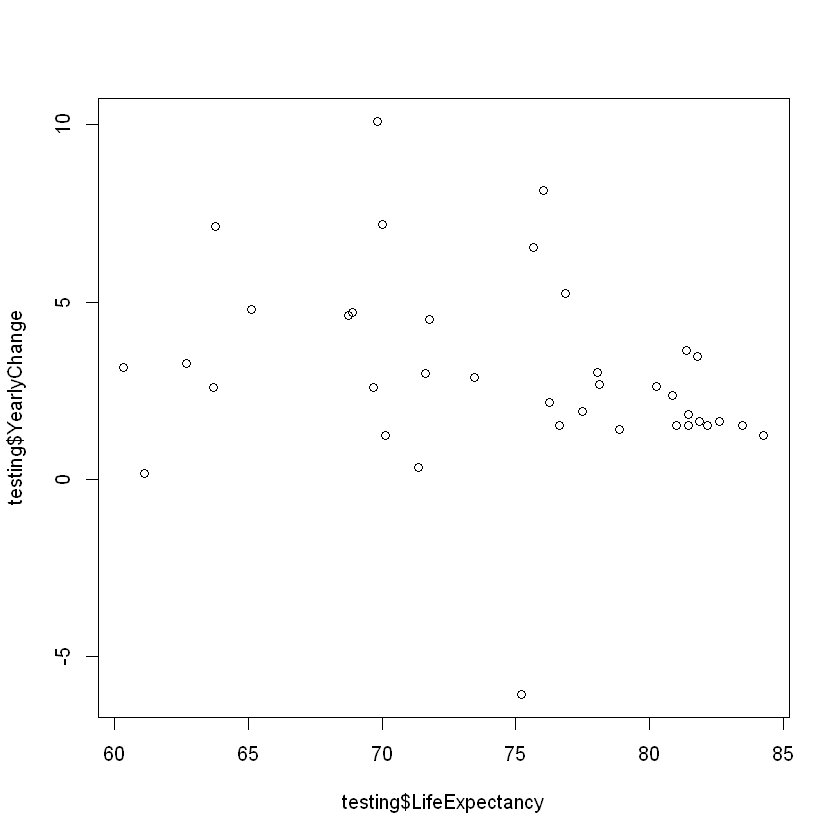

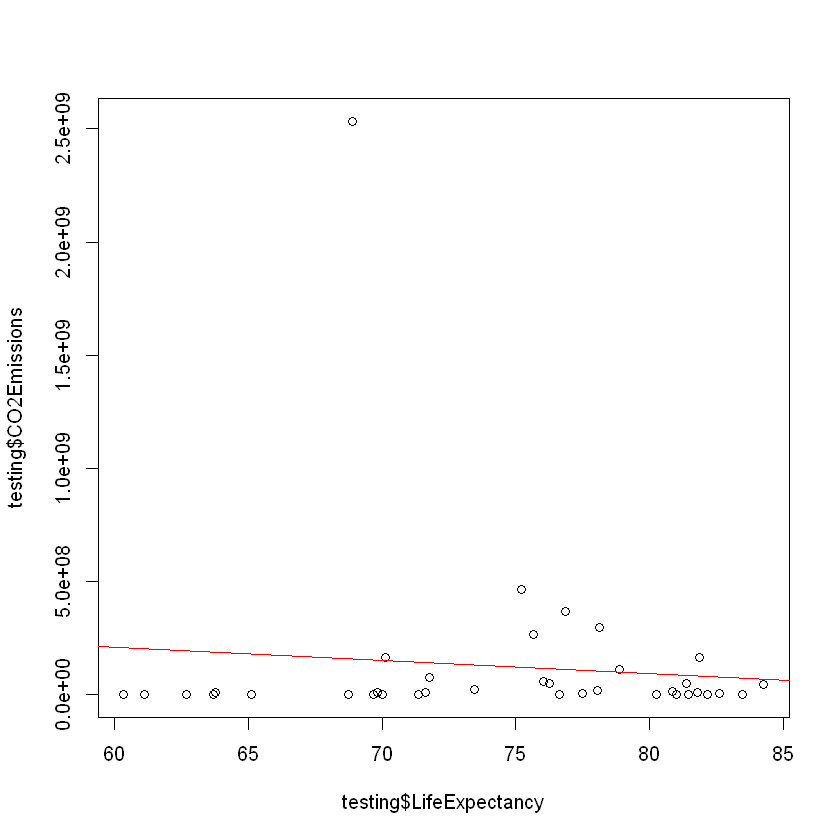


Call:
lm(formula = CO2Emissions ~ LifeExpectancy, data = testing)

Residuals:
       Min         1Q     Median         3Q        Max 
-205858668 -144336486  -84130496  -40766325 2375155020 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)
(Intercept)    559523281  751493173   0.745    0.461
LifeExpectancy  -5820866   10034682  -0.580    0.565

Residual standard error: 420100000 on 36 degrees of freedom
Multiple R-squared:  0.00926,	Adjusted R-squared:  -0.01826 
F-statistic: 0.3365 on 1 and 36 DF,  p-value: 0.5655



Call:
lm(formula = CO2Emissions ~ Population, data = testing)

Residuals:
       Min         1Q     Median         3Q        Max 
-245397264  -21098887  -19751217    9561856  204331916 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.028e+07  1.336e+07   1.519    0.138    
Population  1.896e+00  6.076e-02  31.211   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 79690000 on 36 degrees of freedom
Multiple R-squared:  0.9644,	Adjusted R-squared:  0.9634 
F-statistic: 974.1 on 1 and 36 DF,  p-value: < 2.2e-16



Call:
lm(formula = CO2Emissions ~ LifeExpectancy, data = testing)

Coefficients:
   (Intercept)  LifeExpectancy  
     559523281        -5820866  



Call:
lm(formula = CO2Emissions ~ Population, data = testing)

Coefficients:
(Intercept)   Population  
  2.028e+07    1.896e+00  


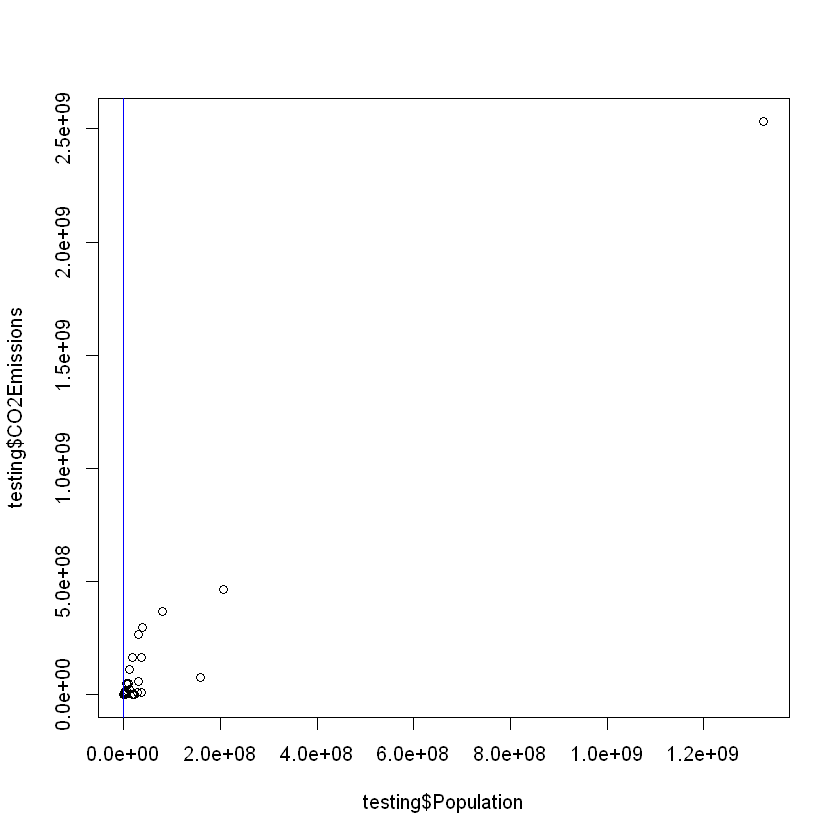

In [36]:
#making a linear regression model
plot(testing$LifeExpectancy, testing$YearlyChange)
#In this graph we can see in no country the yearly change was negative
plot(testing$CO2Emissions~testing$LifeExpectancy)
emission.reg<-lm(CO2Emissions~LifeExpectancy, data=testing)
abline(emission.reg,col='red')
plot(testing$CO2Emissions~testing$Population)
population.reg<-lm(CO2Emissions~Population,data=testing)
abline(emission.reg,col='blue')
summary(emission.reg)
summary(population.reg)
emission.reg
population.reg

In [27]:
testing

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
1,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
5,Anguilla,AIA,30262,1.52,2.10,14429,81.441
6,Antigua and Barbuda,ATG,438763,1.51,4.64,94527,76.617
15,Bangladesh,BGD,74476230,4.50,0.47,157977153,71.785
21,Bermuda,BMU,639352,1.51,10.09,63362,82.163
26,Brazil,BRA,462994920,-6.08,2.25,206163053,75.230
30,Burkina Faso,BFA,2352070,3.14,0.13,18646357,60.354
36,Cayman Islands,CYM,406057,1.52,6.49,62569,83.480
42,Comoros,COM,108422,2.58,0.14,795592,63.700
47,Croatia,HRV,19408194,3.02,4.61,4208602,78.049
